## Agriculture-Vision Data Set

This notebook will serve as a reference guide for the data set we will be using throughout the project. It is arranged as follows:

1. **Data set description**

2. **Some visualisation of input images in the different channels**

In [1]:
# Import the required libraries
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import image


### 1. Description

Here we describe the overall structure of the data set which contains images in three channels (RGB + NIR) of aerial farmland images ([Data set source page](https://www.agriculture-vision.com/dataset)). 

First we confirm the number of samples in the training and test sets. Additionally we verify their dimensionality. 

We will use the following shorthand convention for the classes:

cs <- cloud shadow

dp <- double plant

ps <- planter skip

sw <- standing water

ww <- waterway

wc <- weed cluster

First we inspect the training set

In [2]:
# Set data paths for training set
directories = ['boundaries', 'images/rgb', 'images/nir', 'labels/cloud_shadow',
              'labels/double_plant', 'labels/planter_skip', 'labels/standing_water', 'labels/waterway',
              'labels/weed_cluster', 'masks']
training_paths = [os.path.join(os.getcwd(),'Agriculture-Vision', 'train', sub_dir) for sub_dir in directories]

In [20]:
# Count the image files in each path
def count_files(path):
    n_images = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    print(n_images, "images in", os.path.split(path)[1])

In [21]:
for path in training_paths:
    count_files(path)

12901 images in boundaries


KeyboardInterrupt: 

In [22]:
# Now inspect the image properties in each file
def read_images(path, n_images = None):
    images = []
    counter = 0
    for f in glob.iglob(path + "/*"):
        images.append(Image.open(f))
        counter += 1
        if n_images and (counter >= n_samples):
            print("Read", n_images, "images")
            return images
    print("Read all images")
    return images

In [23]:
n_samples = 250
image_sets = [read_images(path, n_samples) for path in training_paths]

Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images
Read 250 images


In [24]:
for i in range(len(training_paths)):
    sample_image = image_sets[i][0]
    print(os.path.split(training_paths[i])[1], "has images with:")
    print(sample_image.format, "format")
    print(sample_image.mode, "mode")
    print(sample_image.size, "size \n")   

boundaries has images with:
PNG format
L mode
(512, 512) size 

rgb has images with:
JPEG format
RGB mode
(512, 512) size 

nir has images with:
JPEG format
L mode
(512, 512) size 

cloud_shadow has images with:
PNG format
L mode
(512, 512) size 

double_plant has images with:
PNG format
L mode
(512, 512) size 

planter_skip has images with:
PNG format
L mode
(512, 512) size 

standing_water has images with:
PNG format
L mode
(512, 512) size 

waterway has images with:
PNG format
L mode
(512, 512) size 

weed_cluster has images with:
PNG format
L mode
(512, 512) size 

masks has images with:
PNG format
L mode
(512, 512) size 



For the validation sets and test sets we only check their number of images, since everything else is identical to the training set

In [26]:
val_paths = [os.path.join(os.getcwd(),'Agriculture-Vision', 'val', sub_dir) for sub_dir in directories]
print("Images in val set")
for path in val_paths:
    count_files(path)

Images in val set
4431 images in boundaries
4431 images in rgb
4431 images in nir
4431 images in cloud_shadow
4431 images in double_plant
4431 images in planter_skip
4431 images in standing_water
4431 images in waterway
4431 images in weed_cluster
4431 images in masks


In [28]:
test_dirs = ['boundaries', 'images/rgb', 'images/nir', 'masks']
test_paths = [os.path.join(os.getcwd(),'Agriculture-Vision', 'test', sub_dir) for sub_dir in test_dirs]
print("Images in test set")
for path in test_paths:
    count_files(path)

Images in test set
3729 images in boundaries
3729 images in rgb
3729 images in nir
3729 images in masks


## Visualisation

We now visualise some of the input images in the different channels, we only do this for the training set as the validation set and the test set have the same structure

In [29]:
def visualise_image_set(images, path_name, grid_dims):
    fig=plt.figure(figsize = (12,6))
    fig.suptitle("Sample images in " + path_name, fontsize=12)
    for i in range(len(images)):
        fig.add_subplot(grid_dims[0], grid_dims[1], i + 1)
        plt.imshow(np.asarray(images[i]))
        

ValueError: num must be 1 <= num <= 10, not 11

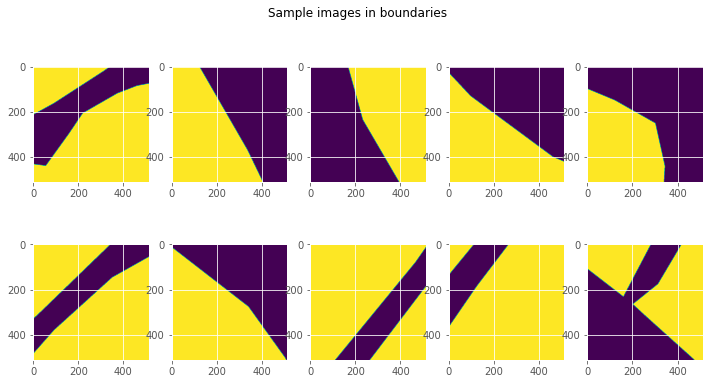

In [30]:
grid_dims = (2,5)
for i in range(len(training_paths)):
    path_name = os.path.split(training_paths[i])[1]
    images = image_sets[i]
    visualise_image_set(images, path_name, grid_dims)
    

Now we inspect the different channels of the rgb images

In [31]:
rgb_images = np.zeros((512, 512, 3, n_samples))
for i in range(len(image_sets[1])):
    rgb_images[:,:,:3, i] = image_sets[1][i]
rgb_images.shape

(512, 512, 3, 250)

(512, 512, 250)


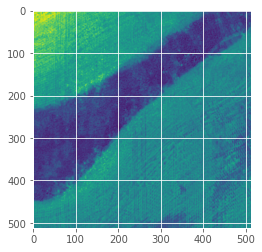

In [32]:
#summary of first channel
first_channel = rgb_images[:,:,0,:]
print(first_channel.shape)
plt.imshow(first_channel[:,:,0])

In [14]:
print("Mean: ", np.mean(first_channel))
print("Max: ", np.max(first_channel))
print("Median: ", np.median(first_channel))
print("Min: ", np.min(first_channel))
print("Stdv: ", np.std(first_channel))

Mean:  115.69382340908051
Max:  255.0
Median:  116.0
Min:  0.0
Stdv:  44.76362412386921


(512, 512, 160)


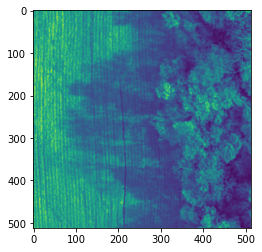

In [15]:
# Summary of second channel
second_channel = rgb_images[:,:,1,:]
print(second_channel.shape)
plt.figure()
plt.imshow(second_channel[:,:,0])

In [16]:
print("Mean: ", np.mean(second_channel))
print("Max: ", np.max(second_channel))
print("Median: ", np.median(second_channel))
print("Min: ", np.min(second_channel))
print("Stdv: ", np.std(second_channel))

Mean:  117.33755125999451
Max:  255.0
Median:  114.0
Min:  0.0
Stdv:  41.7289065596265


(512, 512, 160)


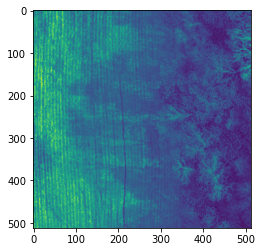

In [17]:
#summary of third channel
third_channel = rgb_images[:,:,2,:]
print(third_channel.shape)
plt.figure()
plt.imshow(third_channel[:,:,0])

In [18]:
print("Mean: ", np.mean(third_channel))
print("Max: ", np.max(third_channel))
print("Median: ", np.median(third_channel))
print("Min: ", np.min(third_channel))
print("Stdv: ", np.std(third_channel))

Mean:  120.99185738563537
Max:  255.0
Median:  119.0
Min:  0.0
Stdv:  40.962017127339294


## Visualisation of segmentation task

In [46]:
# Now inspect the image properties in each file
def read_images_dict(path, n_images = None):
    images = {}
    counter = 0
    for f in glob.iglob(path + "/*"):
        im = Image.open(f)
        images[im.filename.split('/')[-1].split('.')[0]] = np.asarray(im)
        im.close()
        counter += 1
        if n_images and (counter >= n_samples):
            print("Read", n_images, "images")
            return images
    print("Read all images")
    return images

In [ ]:
n_samples = 1000
image_dicts = [read_images_dict(path, n_samples) for path in training_paths]

Read 12901 images
Read 12901 images
Read 12901 images
Read 12901 images
Read 12901 images
Read 12901 images


In [ ]:
rgb_dict = image_dicts[1]
cs_dict = image_dicts[3]
dp_dict = image_dicts[5]
ps_dict = image_dicts[6]
sw_dict = image_dicts[7]
ww_dict = image_dicts[8]
wc_dict = image_dicts[9]

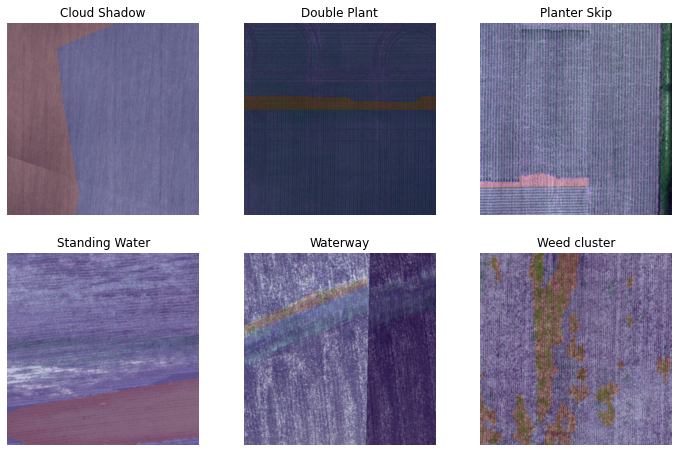

In [62]:
labels = ['Cloud Shadow', 'Double Plant', 'Planter Skip', 'Standing Water', 'Waterway', 'Weed cluster']
plot_index = 1
dicts = [cs_dict, dp_dict, ps_dict, sw_dict, ww_dict, wc_dict]
fig = plt.figure(figsize = (12,12))

for d in dicts:
    for key in d:
        if np.sum(d[key]) > 0:
            label = d[key]
            image_sample = rgb_dict[key]
            break
    fig.add_subplot(3, 3, plot_index)
    plt.imshow(image_sample)
    plt.imshow(label, cmap='jet', alpha=0.25, interpolation = 'none')
    plt.title(labels[plot_index - 1])
    plt.axis('off')
    plot_index += 1

In [3]:
def get_counts(path):
    image_counter = 0
    pixel_counter = 0
    for f in glob.iglob(path + "/*"):
        im = Image.open(f)
        px_sum = np.sum(np.asarray(im))
        im.close()
        if px_sum > 0:
            image_counter += 1
            pixel_counter += px_sum
    return image_counter, pixel_counter
        

In [4]:
labels = ['Cloud Shadow', 'Double Plant', 'Planter Skip', 'Standing Water', 'Waterway', 'Weed cluster']
directories = ['boundaries', 'images/rgb', 'images/nir', 'labels/cloud_shadow',
              'labels/double_plant', 'labels/planter_skip', 'labels/standing_water', 'labels/waterway',
              'labels/weed_cluster', 'masks']
img_counts = []
px_counts = []
for d in training_paths[2:9]:
    im_c, px_c = get_counts(d)
    img_counts.append(im_c)
    px_counts.append(px_c)
    

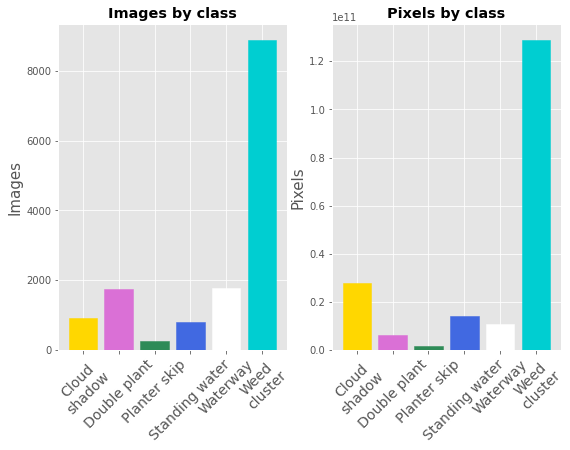

In [6]:
plt.style.use('ggplot')

labels = ['Cloud\nshadow', 'Double plant', 'Planter skip', 'Standing water', 'Waterway', 'Weed\ncluster']


y_pos = np.arange(len(labels))
fig = plt.figure(figsize = (9,6))

fig.add_subplot(1,2,1)
barplot_1 = plt.bar(y_pos, img_counts[1:], align='center', alpha=1)

plt.xticks(y_pos, labels, fontsize=14)
plt.ylabel('Images', fontsize=15)
plt.title('Images by class', fontweight='bold')
plt.xticks(rotation=45)

fig.add_subplot(1,2,2)
barplot_2 = plt.bar(y_pos, px_counts[1:], align='center', alpha=1)
plt.xticks(y_pos, labels, fontsize=14)
plt.ylabel('Pixels', fontsize=15)
plt.title('Pixels by class', fontweight='bold')
plt.xticks(rotation=45)

bar_colors = ['gold','orchid', 'seagreen','royalblue', 'white' ,'darkturquoise']
for bar in range(0,6):
    barplot_1[bar].set_color(bar_colors[bar])
    barplot_2[bar].set_color(bar_colors[bar])
fig.savefig("../Report/Plots/class_imbalance.pdf", bbox_inches='tight')
plt.show()

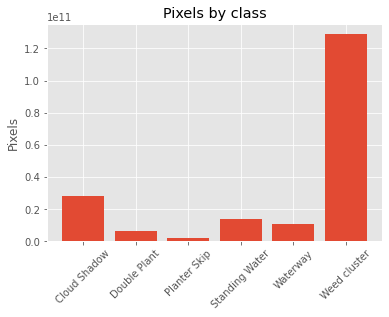

In [14]:
plt.style.use('ggplot')

y_pos = np.arange(len(labels))

plt.bar(y_pos, px_counts[1:], align='center', alpha=1)
plt.xticks(y_pos, labels)
plt.ylabel('Pixels')
plt.title('Pixels by class')
plt.xticks(rotation=45)

plt.show()

In [15]:
temp = np.array(img_counts)
image_shares = temp / 12901
temp = np.array(px_counts)
px_shares = temp / (12901*512*512)
print(image_shares)
print(px_shares)

[1.         0.07216495 0.13650105 0.02092861 0.0631734  0.13712115
 0.68909387]
[108.1013105    8.30181037   1.86202267   0.5517301    4.15578664
   3.16311746  38.14903204]


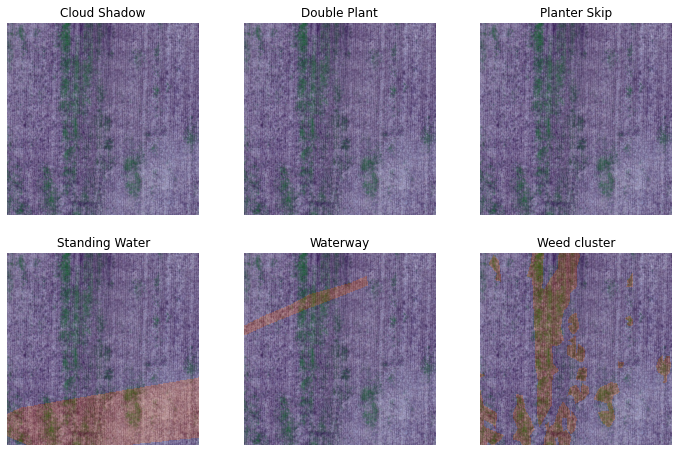

In [55]:
rgb_dict[list(ps_dict.keys())[0]]
fig = plt.figure(figsize = (12,12))

cs_key = list(cs_dict.keys())[0]
cloud_shadow_lb = cs_dict[cs_key]
image_sample = rgb_dict[cs_key]
fig.add_subplot(3, 3, 1)
plt.imshow(image_sample)
plt.imshow(cloud_shadow_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Cloud Shadow')
plt.axis('off')

dp_key = list(dp_dict.keys())[0]
double_plant_lb = dp_dict[dp_key]
image_sample = rgb_dict[dp_key]
fig.add_subplot(3, 3, 2)
plt.imshow(image_sample)
plt.imshow(double_plant_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Double Plant')
plt.axis('off')

ps_key = list(ps_dict.keys())[0]
planter_skip_lb = ps_dict[ps_key]
image_sample = rgb_dict[ps_key]
fig.add_subplot(3, 3, 3)
plt.imshow(image_sample)
plt.imshow(planter_skip_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Planter Skip')
plt.axis('off')

cs_key = list(cs_dict.keys())[0]
cloud_shadow_lb = cs_dict[cs_key]
image_sample = rgb_dict[cs_key]
fig.add_subplot(3, 3, 4)
plt.imshow(image_sample)
plt.imshow(standing_water_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Standing Water')
plt.axis('off')

cs_key = list(cs_dict.keys())[0]
cloud_shadow_lb = cs_dict[cs_key]
image_sample = rgb_dict[cs_key]
fig.add_subplot(3, 3, 5)
plt.imshow(image_sample)
plt.imshow(waterway_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Waterway')
plt.axis('off')

cs_key = list(cs_dict.keys())[0]
cloud_shadow_lb = cs_dict[cs_key]
image_sample = rgb_dict[cs_key]
fig.add_subplot(3, 3, 6)
plt.imshow(image_sample)
plt.imshow(weed_cluster_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Weed cluster')
plt.axis('off')
plt.savefig('labelled_images.pdf') 

In [39]:
rgb_dict = build_image_dict(image_sets[1])
cs_dict = build_image_dict(image_sets[3])
dp_dict = build_image_dict(image_sets[5])
ps_dict = build_image_dict(image_sets[6])
sw_dict = build_image_dict(image_sets[7])
ww_dict = build_image_dict(image_sets[8])
wc_dict = build_image_dict(image_sets[9])

In [41]:
ps_dict.keys()

dict_keys([])

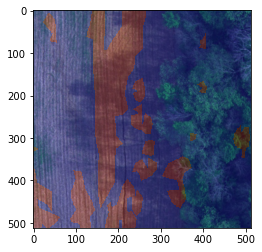

In [19]:
image_sample = rgb_images[:,:,:,0].astype(np.uint8)
weed_cluster_lb = np.asarray(image_sets[9][0])
plt.figure()
plt.imshow(image_sample)
plt.imshow(weed_cluster_lb, cmap='jet', alpha=0.4, interpolation = 'none') 

In [ ]:
{}

In [23]:
print(image_sets[3][8].filename.split('/')[-1].split('.')[0])
print(image_sets[2][8].filename)
print(image_sets[1][8].filename)

A4AXP3TT2_267-2263-779-2775
/Users/romoflo/Documents/MLP/Project/Data/Agriculture-Vision/train/images/nir/8LK6KEGMI_1839-3800-2351-4312.jpg
/Users/romoflo/Documents/MLP/Project/Data/Agriculture-Vision/train/images/rgb/8LK6KEGMI_1839-3800-2351-4312.jpg


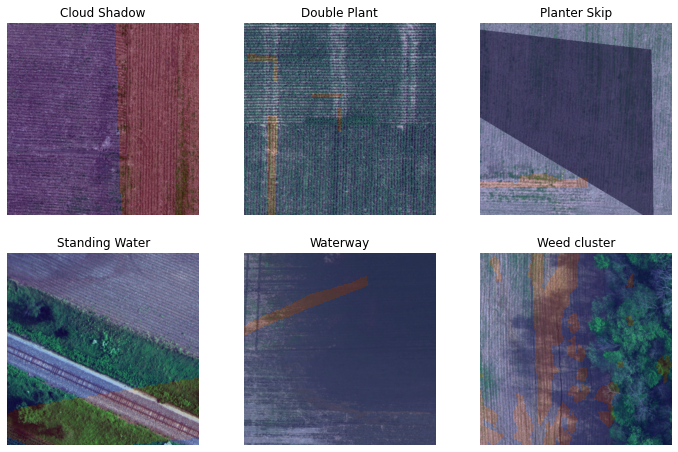

In [146]:
fig = plt.figure(figsize = (12,12))

image_sample = rgb_images[:,:,:,7].astype(np.uint8)

cloud_shadow_lb = np.asarray(image_sets[3][8])
fig.add_subplot(3, 3, 1)
plt.imshow(image_sample)
plt.imshow(cloud_shadow_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Cloud Shadow')
plt.axis('off')

image_sample = rgb_images[:,:,:,-10].astype(np.uint8)
double_plant_lb = np.asarray(image_sets[5][-10])
fig.add_subplot(3, 3, 2)
plt.imshow(image_sample)
plt.imshow(double_plant_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Double Plant')
plt.axis('off')

image_sample = rgb_images[:,:,:,40].astype(np.uint8)
planter_skip_lb = np.asarray(image_sets[6][40])
fig.add_subplot(3, 3, 3)
plt.imshow(image_sample)
plt.imshow(planter_skip_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Planter Skip')
plt.axis('off')

image_sample = rgb_images[:,:,:,53].astype(np.uint8)
standing_water_lb = np.asarray(image_sets[7][53])
fig.add_subplot(3, 3, 4)
plt.imshow(image_sample)
plt.imshow(standing_water_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Standing Water')
plt.axis('off')

image_sample = rgb_images[:,:,:,2].astype(np.uint8)
waterway_lb = np.asarray(image_sets[8][2])
fig.add_subplot(3, 3, 5)
plt.imshow(image_sample)
plt.imshow(waterway_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Waterway')
plt.axis('off')

image_sample = rgb_images[:,:,:,0].astype(np.uint8)
weed_cluster_lb = np.asarray(image_sets[9][0])
fig.add_subplot(3, 3, 6)
plt.imshow(image_sample)
plt.imshow(weed_cluster_lb, cmap='jet', alpha=0.25, interpolation = 'none')
plt.title('Weed cluster')
plt.axis('off')
plt.savefig('labelled_images.pdf')  

2
